In [1]:
# Importing Dependencies
import random
import numpy as np
import pandas as pd
from random import uniform
from citipy import citipy
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the OpenWeatherMap API key and the units for analysis
api_key = "f189580f4edf3f318d0c1ef6df1c1c13"
settings = {"units": "imperial", "APPID": api_key}

# Creating a set of random coordinates (x,y):(Latitude -90 to 90, Longitude -180 to 180)
# Picking 2000 variables to account for duplicates and search errors that may be found
# in the owm API
y = [round(uniform(-180,180),2) for x in np.arange(2000)]
x = [round(uniform(-90,90),2) for x in np.arange(2000)]

# Creating a dataframe from the randomly selected coordinatex
coord = pd.DataFrame({"Lat":x,"Lng":y})
coord.head()

,Lat,Lng
0,29.48,-14.02
1,11.81,-104.76
2,-35.29,-7.75
3,43.05,-27.66
4,-48.05,-2.99


In [2]:
coord["Nearest City"] = ""
coord["Country Code"] = ""

# using citipy to find nearest city based on the Lat and Lng calculated above
for i,row in coord.iterrows():
    City = citipy.nearest_city(row["Lat"], row["Lng"])
    coord.loc[i,"Nearest City"] = City.city_name
    coord.loc[i,"Country Code"] = City.country_code

# dropping any duplicates to get unique list of cities, then resetting the index
coord = coord.drop_duplicates('Nearest City', keep='first').reset_index(drop=True)
print(coord.info())
coord.head()
               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 4 columns):
Lat             766 non-null float64
Lng             766 non-null float64
Nearest City    766 non-null object
Country Code    766 non-null object
dtypes: float64(2), object(2)
memory usage: 24.0+ KB
None


,Lat,Lng,Nearest City,Country Code
0,29.48,-14.02,teguise,es
1,11.81,-104.76,ixtapa,mx
2,-35.29,-7.75,jamestown,sh
3,43.05,-27.66,lagoa,pt
4,-48.05,-2.99,cape town,za
5,43.91,-66.03,yarmouth,ca
6,78.23,-130.86,tuktoyaktuk,ca
7,76.36,-102.64,yellowknife,ca
8,9.54,97.75,ranong,th
9,-47.94,174.03,dunedin,nz


In [3]:
# creating a list that will contain the complete set of cities and its information
# collected from API call
dictionary =[]

# for loop based on the dataframe above will call the owm API for each city
# some cities are not found, hence the try, except to skip the cities that dont
for i,row in coord.iterrows(): 
    
    try:
        test = owm.get_current(f"{row['Nearest City']}, {row['Country Code']}", **settings)
        dictionary.append(test)
        print(f"City #{i}, {row['Nearest City']}: Success")
    except:
        print(f"----City #{i},{row['Nearest City']} not found, Skipping")
        next
    

City #0, teguise: Success
City #1, ixtapa: Success
City #2, jamestown: Success
City #3, lagoa: Success
City #4, cape town: Success
City #5, yarmouth: Success
City #6, tuktoyaktuk: Success
City #7, yellowknife: Success
City #8, ranong: Success
City #9, dunedin: Success
City #10, mukhen: Success
City #11, arraial do cabo: Success
City #12, agirish: Success
City #13, torbay: Success
----City #14,vaitupu not found, Skipping
City #15, namatanai: Success
City #16, busselton: Success
City #17, touros: Success
City #18, kieta: Success
----City #19,palabuhanratu not found, Skipping
City #20, sao filipe: Success
City #21, klaksvik: Success
City #22, severo-kurilsk: Success
City #23, kamenka: Success
City #24, okhotsk: Success
City #25, tasiilaq: Success
City #26, corn island: Success
City #27, vaini: Success
----City #28,mataura not found, Skipping
City #29, bandipur: Success
City #30, hasaki: Success
City #31, butaritari: Success
City #32, abalak: Success
----City #33,tawkar not found, Skipping

City #270, lorengau: Success
City #271, saldanha: Success
City #272, mizdah: Success
City #273, vanavara: Success
City #274, beloha: Success
City #275, colares: Success
City #276, ciudad bolivar: Success
City #277, the pas: Success
City #278, ilulissat: Success
City #279, kisangani: Success
City #280, alice springs: Success
City #281, sisimiut: Success
City #282, taywarah: Success
City #283, along: Success
City #284, surt: Success
City #285, caborca: Success
City #286, burriana: Success
----City #287,olafsvik not found, Skipping
City #288, paamiut: Success
----City #289,mys shmidta not found, Skipping
----City #290,samusu not found, Skipping
City #291, faanui: Success
City #292, pontianak: Success
City #293, port hedland: Success
City #294, hualmay: Success
City #295, chapais: Success
City #296, buraydah: Success
City #297, grindavik: Success
City #298, aginskoye: Success
City #299, steamboat springs: Success
----City #300,aflu not found, Skipping
City #301, ponta do sol: Success
City 

City #537, haikou: Success
City #538, sangar: Success
City #539, rongcheng: Success
City #540, port lincoln: Success
City #541, alghero: Success
City #542, parelhas: Success
City #543, waingapu: Success
----City #544,kazalinsk not found, Skipping
----City #545,urumqi not found, Skipping
City #546, slave lake: Success
----City #547,nizhneyansk not found, Skipping
City #548, requena: Success
City #549, kelamangalam: Success
----City #550,skalistyy not found, Skipping
City #551, aborlan: Success
City #552, hirara: Success
City #553, ponta delgada: Success
City #554, pangkalanbuun: Success
----City #555,lasa not found, Skipping
City #556, fare: Success
City #557, mamakan: Success
City #558, novobiryusinskiy: Success
----City #559,umzimvubu not found, Skipping
City #560, seoul: Success
City #561, longkou: Success
City #562, orebro: Success
City #563, la rioja: Success
City #564, kishtwar: Success
City #565, geraldton: Success
City #566, bima: Success
City #567, jacksonville: Success
City #5

In [4]:
City=[]
Country=[]
Lat=[]
Temp=[]
Humidity=[]
Cloudiness=[]
Windspeed=[]

# From the dictionary created, making a dataframe of desired information
for x in dictionary:
    City.append(x["name"])
    Country.append(x["sys"]["country"])
    Lat.append(x["coord"]["lat"])
    Temp.append(x["main"]["temp"])
    Humidity.append(x["main"]["humidity"])
    Cloudiness.append(x["clouds"]["all"])
    Windspeed.append(x["wind"]["speed"])

completeDF = pd.DataFrame({"City":City,
                           "Country":Country,
                           "Latitude":Lat,
                           "Temperature":Temp,
                           "Humidity":Humidity,
                           "Cloudiness":Cloudiness,
                           "Windspeed":Windspeed,
                          })
completeDF=completeDF[["City","Country","Latitude", "Temperature","Humidity","Cloudiness","Windspeed"]]
completeDF.info()
completeDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 7 columns):
City           683 non-null object
Country        683 non-null object
Latitude       683 non-null float64
Temperature    683 non-null float64
Humidity       683 non-null int64
Cloudiness     683 non-null int64
Windspeed      683 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 37.4+ KB


,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed
0,Teguise,ES,29.06,77.00,53,40,11.41
1,Ixtapa,MX,20.71,77.00,100,40,3.36
2,Jamestown,SH,-15.94,70.82,100,32,17.13
3,Lagoa,PT,37.14,77.00,69,20,12.75
4,Cape Town,ZA,-33.93,60.80,72,75,12.75


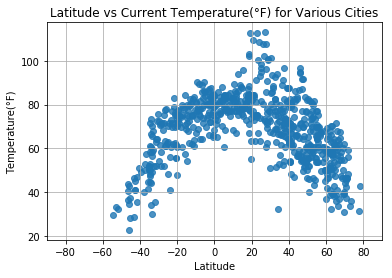

In [5]:
# Plotting using the complete dataframe, then saving the graphs as images 

sns.regplot(x=completeDF["Latitude"],y=completeDF["Temperature"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Temperature(°F)")
plt.title("Latitude vs Current Temperature(°F) for Various Cities")
plt.grid()

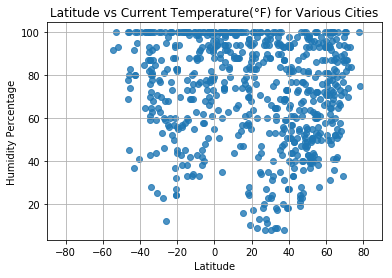

In [6]:
sns.regplot(x=completeDF["Latitude"],y=completeDF["Humidity"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Humidity Percentage")
plt.title("Latitude vs Current Temperature(°F) for Various Cities")
plt.grid()

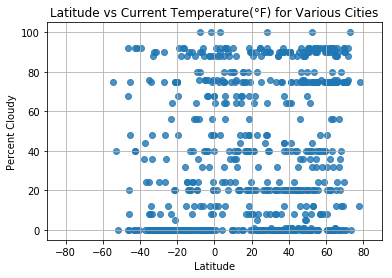

In [7]:
sns.regplot(x=completeDF["Latitude"],y=completeDF["Cloudiness"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Percent Cloudy")
plt.title("Latitude vs Current Temperature(°F) for Various Cities")
plt.grid()

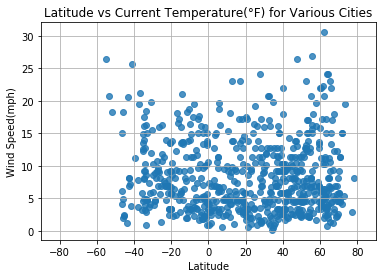

In [8]:
sns.regplot(x=completeDF["Latitude"],y=completeDF["Windspeed"],fit_reg=False)
plt.xlim(-90,90)
plt.ylabel("Wind Speed(mph)")
plt.title("Latitude vs Current Temperature(°F) for Various Cities")
plt.grid()